# DSC 473 - Programming for Big data Project



## Team mumbers:
   - AHMED ALHASANI : 220xxxxxxxx
-  BANDAR ALMURAYKHI` : 219xxxxxxxx

## Dataset: 

<img src="./images/yellow_taxi.jpg">

###  NYC Taxi Trip Data : https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page




In [1]:
import findspark 
findspark.init()
findspark.find()

'C:\\Users\\ahmed\\anaconda3\\envs\\pyspark-Lab5-env\\Lib\\site-packages\\pyspark'

In [2]:
import os
os.environ["JAVA_HOME"] = "C:\Java\jdk-1.8"


In [1]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.config("spark.driver.host", "localhost").appName('Project App').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/08 15:05:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import pandas as pd
import numpy as np

## Task 1

Write a program to import the dataset into Spark.

In [3]:
df = spark.read.csv('./dataset/2020_Yellow_Taxi_Trip_Data.csv', header=True, inferSchema=True)

## Task 2

- Explore the dataset to identify any issues ( missing values, outliers, etc).
- Write a Spark program to clean the dataset.

- To manually Defining the Schema if needed:

In [4]:
df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1|01/01/2020 12:28:...| 01/01/2020 12:33:...|              1|          1.2|         1|                 N|         238|         239|           1|        6.0|  3.0|    0.5|      1.47|         0.0|                  0.3

In [5]:
# Number of rows
num_rows = df.count()

# Number of columns
num_columns = len(df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 24648499
Number of columns: 18


in our data we can see the number of rows is `24,648,499` and we have `18` columns

In [10]:
# Print all columns
print(df.columns)

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']


In [9]:
# Generate summary statistics for all numeric columns in the DataFrame.
# This includes counts, mean, standard deviation, min, and max values for each column.
df.describe().show()

+-------+-------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+---------------------+------------------+--------------------+
|summary|           VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|   passenger_count|     trip_distance|        RatecodeID|store_and_fwd_flag|      PULocationID|      DOLocationID|      payment_type|      fare_amount|             extra|           mta_tax|        tip_amount|      tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|
+-------+-------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------

You can see a statistical summary for each column

In [11]:
df.describe(['tip_amount','tpep_pickup_datetime']).show()

+-------+------------------+--------------------+
|summary|        tip_amount|tpep_pickup_datetime|
+-------+------------------+--------------------+
|  count|          24648499|            24648499|
|   mean| 2.082060782686929|                NULL|
| stddev|2.6107531175011207|                NULL|
|    min|           -493.22|01/01/2003 12:07:...|
|    max|           1393.56|12/31/2020 12:59:...|
+-------+------------------+--------------------+



### Checking the Schema and Summary Statistics
Verify the schema of the DataFrame and view summary statistics for numeric columns to understand the data types and basic statistical information.

In [12]:
df.printSchema()  # Display the schema

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)



- Using printSchema, we can see the columns we have with the data type of that column

### Checking for Missing Values
Identify columns with missing values and count the number of missing values in each column.

In [13]:
from pyspark.sql.functions import col, sum as spark_sum
# Calculate the count of missing values for each column
missing_values_count = df.select([spark_sum(col(c).isNull().cast('int')).alias(c) for c in df.columns])

# Show the count of missing values for each column
missing_values_count.show()


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|  809568|                   0|                    0|         809568|            0|    809568|            809568|           0|           0|      809568|          0|    0|      0|         0|           0|                    0

We have `809,568` missing values in:

1-VendorID

2-passenger_count

3-RatecodeID

4-store_and_fwd_flag

5-payment_type

- `809,568` represents approximately `3.3%` of total rows, meaning it is a very small percentage compared to the total number of data that we have, which is `24,648,499`.

- that will take us to drop all rows that contains any missing values

## remove the missing values

In [14]:
from pyspark.sql.functions import col, count, when
# Drop rows with any null value in any column
df2 = df.dropna()

# Calculate the count of missing (null) values for each column
missing_counts2 = df2.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

# Show the counts of missing (null)values per column
missing_counts2.show() 


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       0|                   0|                    0|              0|            0|         0|                 0|           0|           0|           0|          0|    0|      0|         0|           0|                    0

- we can see that we dont have any missing values, and the dataset is ready to answer on the qustions.

# Task 3

### Question 1 

#### What is the average of the trip distance?

In [15]:
from pyspark.sql.functions import col, mean
# Calculate the average of the 'trip_distance' column in the DataFrame 'df'.
# The 'mean' function from PySpark's SQL functions is used to compute the average,
# and 'col' is used to refer to the 'trip_distance' column.
# The result, which is the average trip distance, is then displayed using the 'show()' method.
df2.select(mean(col('trip_distance'))).show()

+------------------+
|avg(trip_distance)|
+------------------+
|2.7470825671670576|
+------------------+



- The average distance traveled per trip is `2.7` miles reported by taximeter.

### Question 2

#### How many taxi trips per hour?

In [16]:
from pyspark.sql.functions import to_timestamp, hour

# This code transforms the 'df' DataFrame by extracting the hour from the 'tpep_pickup_datetime' column,
# and then adds this as a new column named 'hour'. It then groups the DataFrame by this 'hour' column,
# counts the number of records for each hour, and orders the result by the hour.
# This is useful for analyzing the distribution of data across different hours of the day.
# Finally, it displays the count of records for each hour using the 'show()' method.

# df.withColumn('hour', hour(col('tpep_pickup_datetime'))).groupBy('hour').count().orderBy('hour').show()
# The code above didn't work because the column type is a string not a datetime format.

# Inspect the first few rows of the column
# df.select('tpep_pickup_datetime').show(truncate=False)

# Convert 'tpep_pickup_datetime' from string to datetime format
df2t = df2.withColumn('tpep_pickup_datetime', to_timestamp('tpep_pickup_datetime', 'MM/dd/yyyy hh:mm:ss a'))

# Extract hour, group by the hour, count, order by the hour, and display the result
df2t.withColumn('hour', hour('tpep_pickup_datetime')).groupBy('hour').count().orderBy('hour').show(24)

+----+-------+
|hour|  count|
+----+-------+
|   0| 524776|
|   1| 358419|
|   2| 240967|
|   3| 172506|
|   4| 134345|
|   5| 181820|
|   6| 470882|
|   7| 856183|
|   8|1133937|
|   9|1160286|
|  10|1198387|
|  11|1274596|
|  12|1387694|
|  13|1426775|
|  14|1523877|
|  15|1552176|
|  16|1478875|
|  17|1596758|
|  18|1654029|
|  19|1439597|
|  20|1200391|
|  21|1117454|
|  22|1001868|
|  23| 752333|
+----+-------+



- We can see the number of taxi trips per hour

#### What is the peak hour and least busy hour and show the avrage trips for each hour?

In [17]:
from pyspark.sql.functions import max as max_, min as min_

# Group by hour and count
hourly_counts = df2t.withColumn('hour', hour('tpep_pickup_datetime')).groupBy('hour').count()

# Find the peak hour
peak_hour = hourly_counts.orderBy(hourly_counts['count'].desc()).first()
print(f"Peak Hour: {peak_hour['hour']} with {peak_hour['count']} records")

# Find the least busy hour
least_busy_hour = hourly_counts.orderBy(hourly_counts['count']).first()
print(f"Least Busy Hour: {least_busy_hour['hour']} with {least_busy_hour['count']} records")

# Calculate and display average tip amount by hour
df2tavg = df2t.withColumn('hour', hour(col('tpep_pickup_datetime'))).groupBy('hour').agg(mean('tip_amount')).orderBy('hour').show(24)

Peak Hour: 18 with 1654029 records


Least Busy Hour: 4 with 134345 records


+----+------------------+
|hour|   avg(tip_amount)|
+----+------------------+
|   0|2.2406267626568783|
|   1| 2.054814923316039|
|   2| 1.915449501384015|
|   3|1.9186461920165043|
|   4|2.0390742491346896|
|   5| 2.288008304916951|
|   6| 1.924910444654932|
|   7| 1.969723657208829|
|   8|2.0342175711702173|
|   9| 1.992501159197004|
|  10|1.9410012291522367|
|  11|1.9109827663040395|
|  12|1.9272653913615285|
|  13| 1.954740284908278|
|  14|2.0077145727640677|
|  15|2.0403582003587073|
|  16|2.1734307835347475|
|  17|2.1871296652341297|
|  18| 2.191396390268788|
|  19| 2.174424835561582|
|  20| 2.260145702525249|
|  21| 2.314985135853445|
|  22| 2.353222320704919|
|  23| 2.284444853542311|
+----+------------------+



- At `6 PM`, the tip amount reaches its peak with `1,654,029` trips, while the lowest tip amount is observed at `4 AM` with `134,345` trips. It's important to note that the amount of tips given in cash is not included in these calculations.

### Question 3

#### What is  the Most Payment methods ?

In [18]:
df2.groupBy('payment_type').count().show()

+------------+--------+
|payment_type|   count|
+------------+--------+
|           1|17463663|
|           3|  144463|
|           4|   82360|
|           2| 6148430|
|           5|      15|
+------------+--------+



In [20]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Mapping based on the data dictionary
payment_type_mapping = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    
}

# Define a UDF to convert payment type codes to names
def get_payment_type_name(payment_type_code):
    return payment_type_mapping.get(payment_type_code, "NULL")

udf_get_payment_type_name = udf(get_payment_type_name, StringType())

# Apply the mapping to the DataFrame and show results
pym = df2.withColumn("payment_type_name", udf_get_payment_type_name("payment_type")) \
  .groupBy("payment_type_name") \
  .count() \
  .show()

+-----------------+--------+
|payment_type_name|   count|
+-----------------+--------+
|             Cash| 6148430|
|          Dispute|   82360|
|        No charge|  144463|
|      Credit card|17463663|
|          Unknown|      15|
+-----------------+--------+



- Most people use credit cards to pay for taxi rides. This shows they like using cards, probably because it's safer and makes sure the taxi drivers charge the right amount. This means supporting credit card payments in taxis is a good idea.

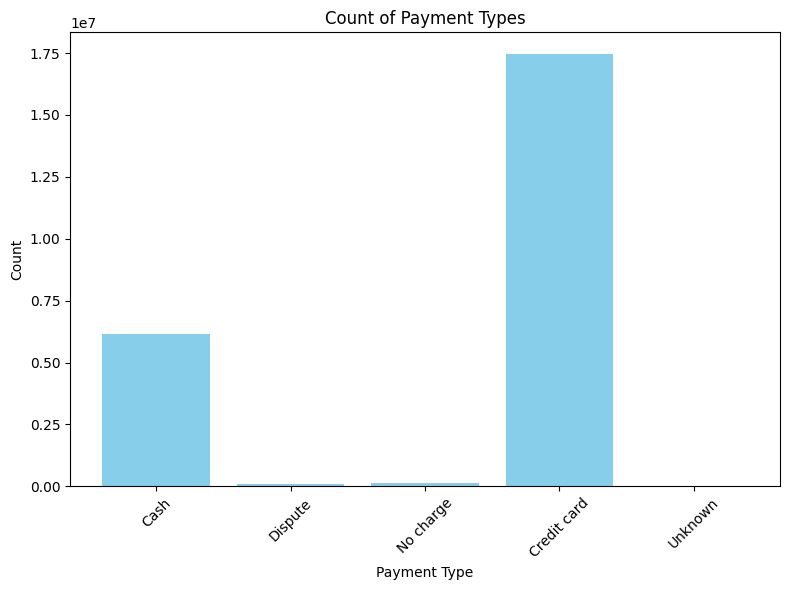

In [19]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, when

# Assuming 'df2' is your PySpark DataFrame

# Using PySpark's 'when' and 'otherwise' functions to create a new column with mapped labels
df22 = df2.withColumn("payment_label",
                     when(col("payment_type") == 1, "Credit card")
                     .when(col("payment_type") == 2, "Cash")
                     .when(col("payment_type") == 3, "No charge")
                     .when(col("payment_type") == 4, "Dispute")
                     .when(col("payment_type") == 5, "Unknown")
                     .otherwise("Other")
                    )

# Calculate counts for each unique value in the 'payment_label' column
counts = df22.groupBy('payment_label').count().collect()

# Extract labels and counts for the bar chart
labels = [row['payment_label'] for row in counts]
count_values = [row['count'] for row in counts]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, count_values, color='skyblue')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Count of Payment Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



- The bar chart shows that the most common ways people pay for taxis are with credit cards and cash.

### Question 4

#### what is the total amount for each payment method?

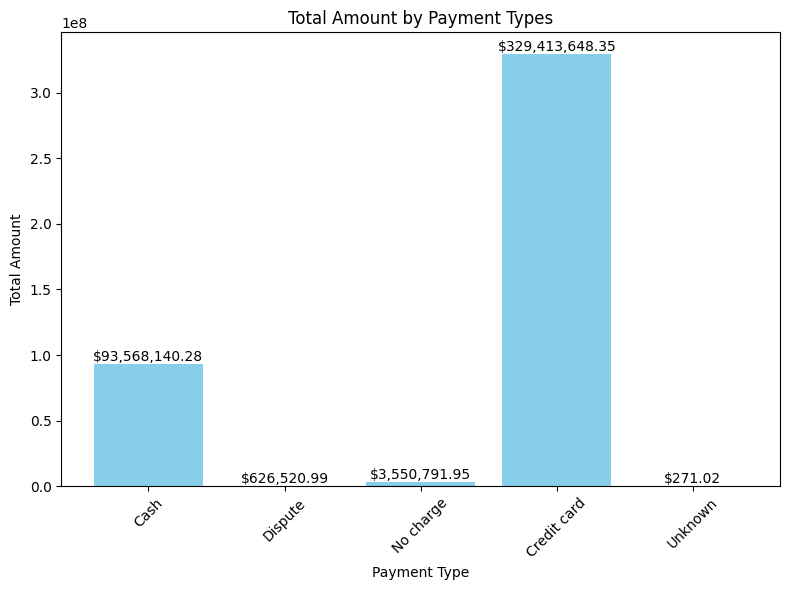

In [21]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F



# Aggregate the total amount for each payment type
agg_df = df22.groupBy('payment_label').agg(F.sum('total_amount').alias('total_amount_sum'))
#agg_df = df2.groupBy('payment_type').agg(F.sum('total_amount').alias('total_amount_sum'))


# Extract labels and total amounts for the bar chart
labels = [row['payment_label'] for row in agg_df.collect()]
total_amounts = [row['total_amount_sum'] for row in agg_df.collect()]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, total_amounts, color='skyblue')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Payment Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding total amounts as text labels on each bar
for bar, amount in zip(bars, total_amounts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${:,.2f}'.format(amount), ha='center', va='bottom')

plt.tight_layout()
plt.show()


- This shows the total amount paid by each payment method. The most used method is the credit card, with total payments of `$329,413,648.35`.

### Question 5


#### How many  trip were recorded, store and forward to the server Immediately?

In [22]:
df2.groupBy('Store_and_fwd_flag').count().show()

+------------------+--------+
|Store_and_fwd_flag|   count|
+------------------+--------+
|                 Y|  245259|
|                 N|23593672|
+------------------+--------+



- There were `245,259` cases marked '`Y`' for store-and-forward trips, indicating the driver had server issues and had to send the data later.
- On the other hand, in the `23,593,672` cases marked '`N`', it indicates that the drivers were able to immediately send data to the server without encountering any issues.

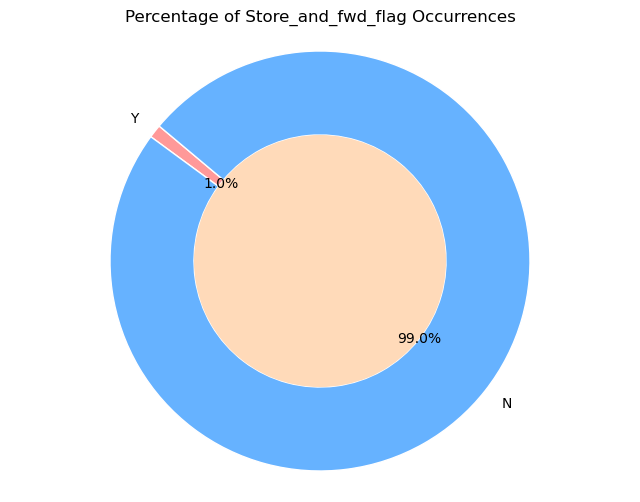

In [25]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Assuming 'df2' is your PySpark DataFrame

# Calculate percentages for each unique value in 'Store_and_fwd_flag' column
counts = df2.groupBy('Store_and_fwd_flag').count()
total_count = counts.agg(F.sum('count')).collect()[0][0]

percentages = counts.withColumn('percentage', (F.col('count') / total_count) * 100).toPandas()

# Plotting the donut chart
plt.figure(figsize=(8, 6))

# Outer pie chart (larger circle)
outer_colors = ['#FF9999', '#66B2FF']  # Example colors, adjust as needed
plt.pie(percentages['percentage'], labels=percentages['Store_and_fwd_flag'], autopct='%1.1f%%', startangle=140, colors=outer_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Inner pie chart (smaller circle to create the donut)
inner_colors = ['#FFDAB9', '#ADD8E6']  # Example colors, adjust as needed
plt.pie([100], radius=0.6, colors=inner_colors)

plt.title('Percentage of Store_and_fwd_flag Occurrences')
plt.axis('equal')
plt.show()


- Most of the trips, about `99%` of them, were recorded and sent to the server right away. Only `1%` were not. This shows that the internet in the taxi cars works really well. It looks like there's no need to make the internet connection better in the taxis right now.

### Question 6

#### What is the total amount of money collected during the year 2020?

In [23]:
# Calculate the sum of the 'Total_amount' column
total_amount_sum = df2.agg(spark_sum('Total_amount')).collect()[0][0]

# Convert the sum to an integer
total_amount_sum_int = int(total_amount_sum)

# Show the sum of 'Total_amount' column
print("Sum of Total amount of all trips in 2020:", "$",total_amount_sum_int)

Sum of Total amount of all trips in 2020: $ 427159372


### Question 7

#### Through the taxi operating companies, what is the company most used by people?, and what is the total of these amounts for each company?

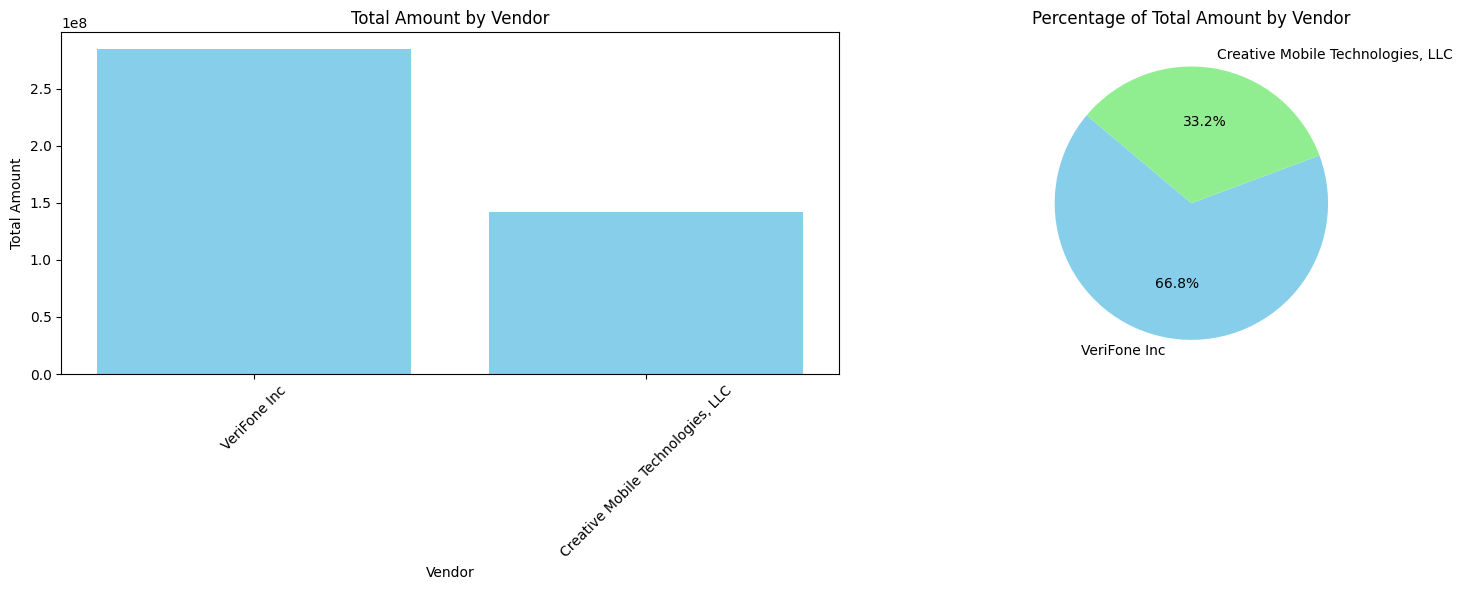

In [26]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

df33 = df2.withColumn("VendorID2",
                      F.when(F.col("VendorID") == 1, "Creative Mobile Technologies, LLC")
                      .when(F.col("VendorID") == 2, "VeriFone Inc")
                     )

# Aggregate the total amount for each VendorID2
agg3_df = df33.groupBy('VendorID2').agg(F.sum('total_amount').alias('total_amount_sum'))

# Convert VendorID2 to strings explicitly
labels = [str(row['VendorID2']) for row in agg3_df.collect()]
total_amounts = [row['total_amount_sum'] for row in agg3_df.collect()]

# Calculate percentages
total = sum(total_amounts)
percentages = [amount / total * 100 for amount in total_amounts]

# Plotting both bar chart and pie chart
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
ax[0].bar(labels, total_amounts, color='skyblue')
ax[0].set_xlabel('Vendor')
ax[0].set_ylabel('Total Amount')
ax[0].set_title('Total Amount by Vendor')
ax[0].tick_params(axis='x', rotation=45)

# Pie chart
ax[1].pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
ax[1].set_title('Percentage of Total Amount by Vendor')

plt.tight_layout()
plt.show()

| <img src="./images/verifone_logo.png"> | **VS.** | <img src="./images/CMT_logo.png"> |
|-----------------|-----------------|-----------------|



- In 2020, NYC taxis mainly worked with two companies: Creative Mobile Technologies, LLC and VeriFone Inc. They handle payments and other systems in yellow taxis.

- The bar chart shows that VeriFone Inc made more money, earning `$285,267,077.72USD`.
- Creative Mobile Technologies, LLC earned less, making `$141,892,294.87USD`.

- The pie chart also shows how much each company earned compared to the other. This helps us see how much bigger VeriFone Inc is in the market.

- This data tells us VeriFone Inc is way ahead because they offer better services and make it easy for people to pay and use other services. This means Creative Mobile Technologies, LLC needs to improve what they offer to catch up.